# K-Nearest Neighbors (KNN) Algorithm Overview

The **K-Nearest Neighbors (KNN)** algorithm is a simple, yet powerful machine learning technique used for classification and regression tasks. KNN is a **lazy learning algorithm**, meaning that it doesn't learn an explicit model from the training data. Instead, it memorizes the training dataset and makes predictions based on the proximity of new data points to the training points.

### **How KNN Works:**
1. **Distance Calculation**: For a given test point, the KNN algorithm computes the distance between the test point and all the points in the training dataset. Common distance metrics include Euclidean distance, Manhattan distance, and Minkowski distance.

2. **Find Neighbors**: The algorithm selects the **k** nearest neighbors based on the calculated distances.

3. **Prediction**: For classification, the algorithm assigns the most common class among the **k** nearest neighbors to the test point. For regression, the output is typically the average (or weighted average) of the target values of the nearest neighbors.

### **Advantages of KNN:**
- **Simple to Implement**: KNN is easy to understand and implement, requiring no training phase or optimization.
- **No Assumptions About Data Distribution**: KNN makes no assumptions about the underlying data distribution, making it useful for problems with complex data distributions.
- **Non-Parametric**: KNN does not require a functional form to be specified, and is flexible for different types of datasets.
- **Effective for Small Datasets**: KNN can perform well on small to moderate datasets with relatively low dimensionality.

### **Disadvantages of KNN:**
- **Computationally Expensive**: KNN can be slow, especially with large datasets, as it requires calculating the distance between the test point and all training points.
- **Sensitive to the Curse of Dimensionality**: The performance of KNN degrades in high-dimensional spaces, where the notion of "nearness" becomes less meaningful.
- **Sensitive to Irrelevant Features**: KNN can be heavily influenced by irrelevant or redundant features in the dataset, leading to poor performance.
- **Choice of K and Distance Metric**: The choice of the number of neighbors **k** and the distance metric has a significant impact on the model's performance, and finding the optimal values can be challenging.

---

## Dataset Description

In this implementation, the **Digits Dataset** from `sklearn.datasets.load_digits` is used. This dataset consists of 8x8 pixel images of handwritten digits, with each image representing a digit from 0 to 9.

### **Dataset Details:**
- **Number of Instances**: 1797 samples.
- **Number of Features**: 64 features (corresponding to the 64 pixels in the 8x8 images).
- **Target Labels**: The target variable represents the digit (0–9) that each image corresponds to.

### **Preprocessing Steps**:
- The dataset is **split** into training and testing sets, with 80% used for training and 20% for testing.
- **Standardization** is applied to the features to ensure that each feature contributes equally to the distance calculations in KNN.

The KNN algorithm is applied on this dataset to classify the digits based on their pixel values.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from collections import Counter

In [3]:
# Load the Digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Euclidean distance function
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

In [4]:
# KNN Algorithm
def knn(X_train, y_train, X_test, k=3):
    predictions = []
    for test_point in X_test:
        # Calculate distances from test point to all training points
        distances = [euclidean_distance(test_point, train_point) for train_point in X_train]

        # Get the indices of the k nearest neighbors
        k_indices = np.argsort(distances)[:k]

        # Get the corresponding labels of the k nearest neighbors
        k_nearest_labels = [y_train[i] for i in k_indices]

        # Predict the most common label (majority vote)
        most_common = Counter(k_nearest_labels).most_common(1)
        predictions.append(most_common[0][0])

    return np.array(predictions)

# Run KNN on the test set
k = 3
y_pred = knn(X_train, y_train, X_test, k)

# Evaluate the model
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy of the KNN model with k={k}: {accuracy * 100:.2f}%')

Accuracy of the KNN model with k=3: 98.33%


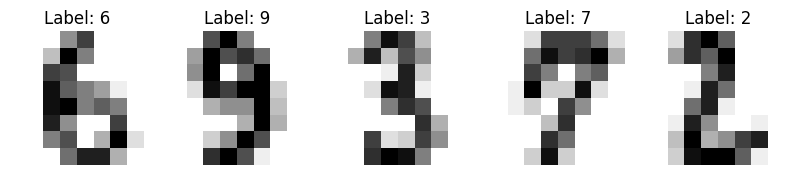

In [6]:
# Visualize the first few digits
def plot_digits(images, labels, num_digits=5):
    plt.figure(figsize=(10, 5))
    for i in range(num_digits):
        plt.subplot(1, num_digits, i + 1)
        plt.imshow(images[i].reshape(8, 8), cmap=plt.cm.binary)
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.show()

# Display first few images
plot_digits(X_test, y_test, num_digits=5)

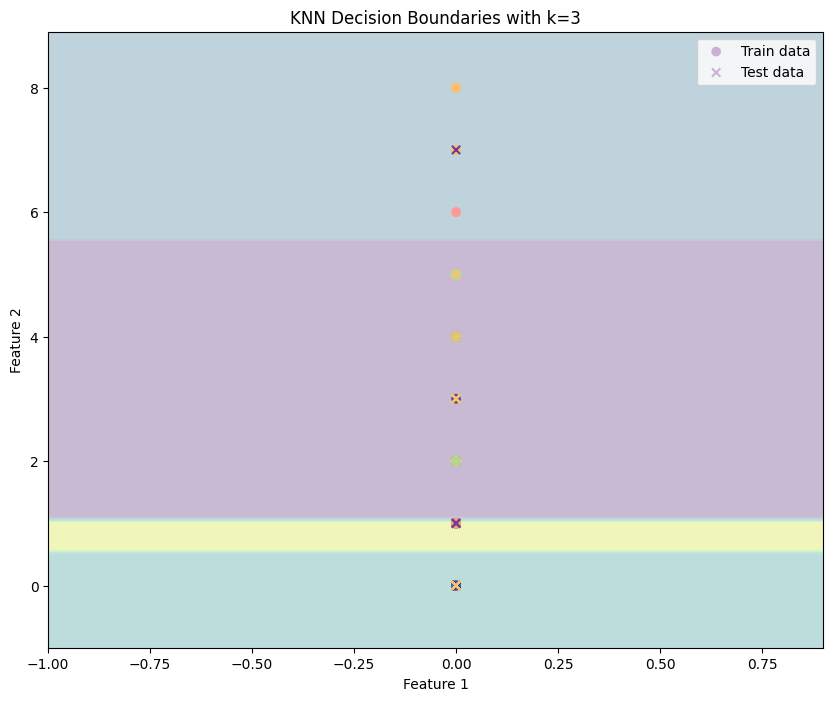

In [11]:
# Visualize Decision Boundaries (for the first two features)
def plot_decision_boundaries(X_train, y_train, X_test, y_test, k=3):
    # Take the first two features for visualization
    X_train_2d = X_train[:, :2]
    X_test_2d = X_test[:, :2]

    # Create KNN predictions for the grid points
    x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
    y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    # Predict class labels for each point in the grid
    y_grid_pred = knn(X_train_2d, y_train, grid_points, k=k)
    y_grid_pred = y_grid_pred.reshape(xx.shape)

    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, y_grid_pred, alpha=0.3)
    plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap=plt.cm.Paired, marker='o', label="Train data")
    plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, cmap=plt.cm.Paired, marker='x', label="Test data")
    plt.title(f"KNN Decision Boundaries with k={k}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

# Plot decision boundaries for the first two features
plot_decision_boundaries(X_train, y_train, X_test, y_test, k=3)


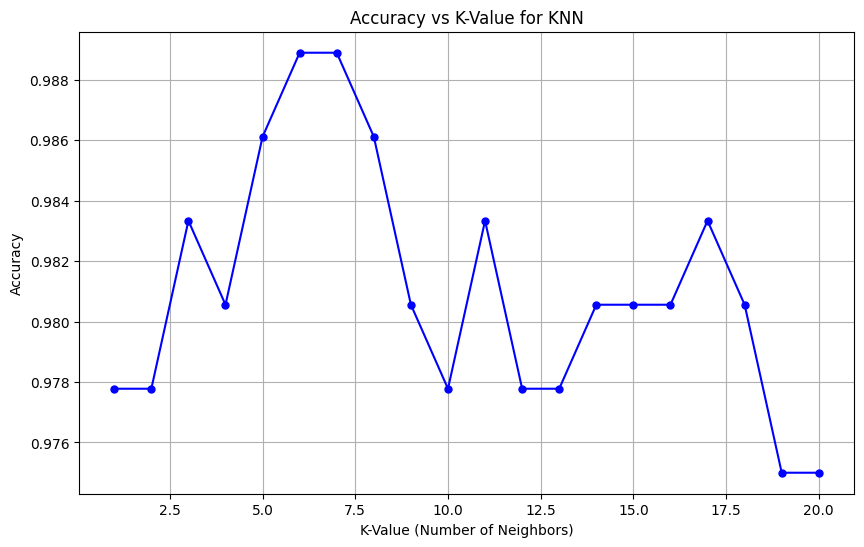

In [13]:
# Accuracy vs K-Value
def plot_accuracy_vs_k(X_train, y_train, X_test, y_test):
    k_values = range(1, 21)
    accuracies = []

    for k in k_values:
        y_pred = knn(X_train, y_train, X_test, k)
        accuracy = np.mean(y_pred == y_test)
        accuracies.append(accuracy)

    plt.figure(figsize=(10, 6))
    plt.plot(k_values, accuracies, marker='o', color='b', linestyle='-', markersize=5)
    plt.title("Accuracy vs K-Value for KNN")
    plt.xlabel("K-Value (Number of Neighbors)")
    plt.ylabel("Accuracy")
    plt.grid(True)
    plt.show()

# Plot accuracy vs k-value
plot_accuracy_vs_k(X_train, y_train, X_test, y_test)

# Results and Discussion

1. **Digits Visualization**:
   - The first image shows examples of handwritten digits from the **Digits dataset**. These are the raw inputs for KNN classification, where each digit is represented by pixel values.

2. **Decision Boundaries**:
   - The second plot visualizes the **decision boundaries** created by the KNN classifier using the first two features. It shows how KNN separates the classes based on proximity to training points. Training and test data points are plotted with different markers.

3. **Accuracy vs K-Value**:
   - The third plot shows the **accuracy** of KNN across different `k` values. The model performs best at **k ≈ 5**, with a noticeable drop in accuracy for higher and lower values of `k`, suggesting that a smaller neighborhood size works better for this dataset.

### Key Insights:
- The **decision boundaries** demonstrate how KNN classifies data by proximity to nearest neighbors.
- The **accuracy vs k** plot shows that **k=5** provides the best performance, indicating the model's sensitivity to the choice of `k`.
- KNN effectively classifies **handwritten digits** when tuned properly, performing well on this dataset.

